## MINIST 분류모델 구현

- 목적 : 손글씨 숫자 0~9 이미지를 분류
- 데이터 : Keras의 내장 데이터 셋 사용

### [1] 데이터준비

In [12]:
import tensorflow as tf

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets.mnist import load_data

import numpy as np
import matplotlib.pyplot as plt

### [1-1] 데이터 로딩

In [14]:
(X_train,y_train),(X_test,y_test)=load_data()

In [15]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [16]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

### [2]이미지 분류모델 구현

### [2-1]모델 설계 => 층 설정

- 입력층 => 입력 28*28=784 , 출력 , 활성화 함수 relu
- 은닉층 => 입력            , 출력 , 활성화 함수 relu
- 출력층 => 입력            , 출력 10 , 활성화 함수 softmax

### [2-2]모델생성 => 최적화, 손실, 평가지표

- 기본 최적화, 손실, 평가지표 설정

In [17]:
mm = Sequential(name = 'mnist_model')
mm.add(Dense(30, activation = 'relu', input_shape = (784,)))
mm.add(Dense(10, activation = 'softmax'))
mm.summary()
mm.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['acc'])

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                23550     
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [19]:
mm.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

- 사용자 지정 최소화, 손실, 평가지표 설정

In [20]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.optimizers import Adam

In [21]:
adam_op=Adam(learning_rate=0.1)
acc_=Accuracy(dtype=tf.int32)
loss_=SparseCategoricalCrossentropy(from_logits=True)

In [23]:
mm.compile(optimizer=adam_op,loss=loss_,metrics=[acc_])

### [3] 학습

- 입력층 => input_shape( 피쳐수,) 또는 input_shape=[피쳐수]

In [26]:
X_train.shape

(60000, 28, 28)

In [28]:
X_train=X_train.reshape(60000,-1)

In [29]:
X_train.shape

(60000, 784)

### [3-2]학습실행 ==> 학습횟수 epochs

In [30]:
EPOCHS,VAL_SPLIT=100,0.2

In [33]:
mm.fit(X_train,y_train,epochs=EPOCHS,validation_split=VAL_SPLIT)

Epoch 1/100


TypeError: 'NoneType' object is not callable

### [4] 평가
- 테스트 데이터 사용 => 입력 데이터의 형(shape) 설정

In [34]:
X_test.shape

(10000, 28, 28)

In [36]:
X_test=X_test.reshape(10000,-1)
X_test.shape

(10000, 784)

In [37]:
mm.evaluate(X_test,y_test)

c:\Users\y2kjd\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


ValueError: in user code:

    File "c:\Users\y2kjd\anaconda3\lib\site-packages\keras\engine\training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\y2kjd\anaconda3\lib\site-packages\keras\engine\training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\y2kjd\anaconda3\lib\site-packages\keras\engine\training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\y2kjd\anaconda3\lib\site-packages\keras\engine\training.py", line 1759, in test_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\y2kjd\anaconda3\lib\site-packages\keras\engine\training.py", line 1122, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\y2kjd\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "c:\Users\y2kjd\anaconda3\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
        update_op = update_state_fn(*args, **kwargs)
    File "c:\Users\y2kjd\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "c:\Users\y2kjd\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 691, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\y2kjd\anaconda3\lib\site-packages\keras\metrics\metrics.py", line 3571, in accuracy  **
        y_true.shape.assert_is_compatible_with(y_pred.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


## [5] 예측

In [38]:
test_data=np.reshape(X_test[0],(28,28))

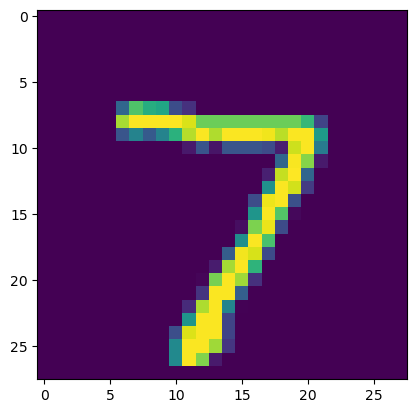

In [39]:
plt.imshow(test_data)

In [40]:
np.set_printoptions(suppress=True, floatmode='fixed')

In [41]:
y_pre=mm.predict(test_data.reshape(1,-1))

1/1 [==============================] - 0s 69ms/step


In [42]:
np.argmax(y_pre)

0